In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img=cv2.imread("coin.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [17]:
def rewatershed(img,gray_img):
    _,thresh=cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel=np.ones((3,3))
    opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
    sure_bg=cv2.dilate(opening,kernel,iterations=2)
    dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
    cv2.normalize(dist_transform,dist_transform,0,1.0,cv2.NORM_MINMAX)
    _,sure_fg=cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
    sure_fg=np.uint8(sure_fg)
    unknow = cv2.subtract(sure_bg, sure_fg)
    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknow == 255] = 0
    markers_copy = markers.copy()
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [0, 0, 255]



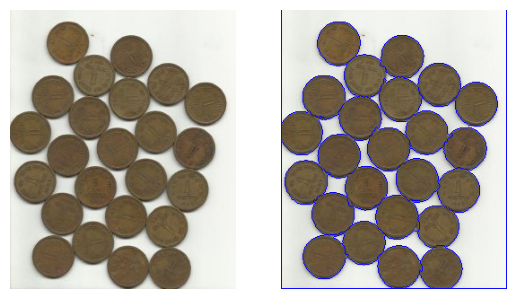

In [18]:
img1=img.copy()
plt.subplot(121),plt.imshow(img1),plt.axis("off")
rewatershed(img,gray_img)
plt.subplot(122),plt.imshow(img),plt.axis("off")
plt.show()